## Gaussian Discriminant Analysis
``` IRM2016003 Aditya Goel```

Use the microchip data set available in your link on my website. Use 70% of the data for training and 30% for testing.For two features, first  using Bux- Muller transformation create new data set having Gaussian distribution within the range of the given  data set and  create Gaussian Discriminant Analysis (GDA)  model. Thereafter utilize the model to predict where a component will be accepted or rejected using testing data


### Data Processing

In [241]:
import pandas as pd
import numpy as np
import sklearn
from numpy import random, sqrt, log, sin, cos, pi
from pylab import show,hist,subplot,figure
from sklearn.model_selection import train_test_split



In [35]:
df = pd.read_csv("Microchip_dataset.csv")
df.head()
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [173]:
feature_1 = np.array(X_train["feature_1"])
feature_2 = np.array(X_train["feature_2"])

data = np.array([X_train["feature_1"], X_train["feature_2"]]).T

#### Box-Muller Transformation


In [187]:
def box_muller_transform(u1,u2):
    z1 = sqrt(abs(-2*log(abs(u1))))*cos(2*pi*u2)
    z2 = sqrt(abs(-2*log(abs(u1))))*sin(2*pi*u2)
    return z1,z2

In [219]:
# run the transformation
XB_feature_1,XB_feature_2 = box_muller_transform(feature_1, feature_2)

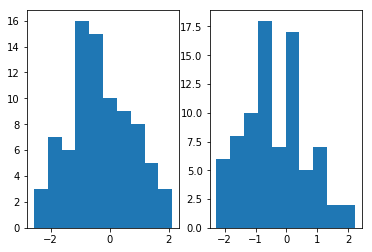

In [215]:
figure()
subplot(121) # the second contains
hist(XB_train)     # the histograms of z1 and z2
subplot(122)
hist(XB_test)
show()

#### GDA Algorithm

<img src="GDA_Params.png">

In [191]:
import numpy as np
from scipy.stats import multivariate_normal

class GDA:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.__classes = np.unique(y)
        n_classes = len(self.__classes)
        
        self.__phi = np.zeros((n_classes, 1))
        self.__means = np.zeros((n_classes, n_features))
        self.__sigma = 0
        for i in range(n_classes):
            indexes = np.flatnonzero(y == self.__classes[i])

            self.__phi[i] = len(indexes) / n_samples
            self.__means[i] = np.mean(X[indexes], axis=0)
            self.__sigma += np.cov(X[indexes].T) * (len(indexes) - 1)

        self.__sigma /= n_samples

    def predict(self, X):
  
        pdf = lambda mean: multivariate_normal.pdf(X, mean=mean, cov=self.__sigma)
        y_probs = np.apply_along_axis(pdf, 1, self.__means) * self.__phi

        return self.__classes[np.argmax(y_probs, axis=0)]

#### GDA without Box Muller Transformation

In [244]:
gda_original = GDA()
gda_original.fit(X_train.to_numpy(), y_test.to_numpy())
gda_original_predict = gda_original.predict(X_test.to_numpy())

In [242]:
sklearn.metrics.accuracy_score(gda_original_predict, y_test)

0.4444444444444444

#### GDA with Box Muller Transformation 

In [238]:
gda_box = GDA()
gda_box.fit(np.array([XB_feature_1, XB_feature_2]).T, y_test)
gda_box_predict = gda_box.predict(X_test.to_numpy())


In [243]:
sklearn.metrics.accuracy_score(gda_box_predict, y_test)

0.6111111111111112

#### Compare the performance of GDA in both the above cases

```Accuracy without Transformation: 0.444```

```Accuracy with Box-Muller method: 0.6111```

``` Evidently, transformation has helped in increasing accuracy```